In [3]:
from __future__ import division
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from IPython.core.pylabtools import figsize

np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

%matplotlib inline
figsize(16, 8)

Based on [Machine learning - Introduction to Gaussian processes](https://www.youtube.com/watch?v=4vGiHC35j9s) and [Gaussian Processes for Machine Learning](http://gaussianprocess.org/gpml/)

In [4]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()

In [5]:
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1 # l^2
    # a^2 -2ab + b^2
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

In [6]:
N = 10 # number of training points.
n = 150 # number of test points.
s = 0.00005 # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-4, 3, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

In [7]:
# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

In [8]:
# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

In [9]:
# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

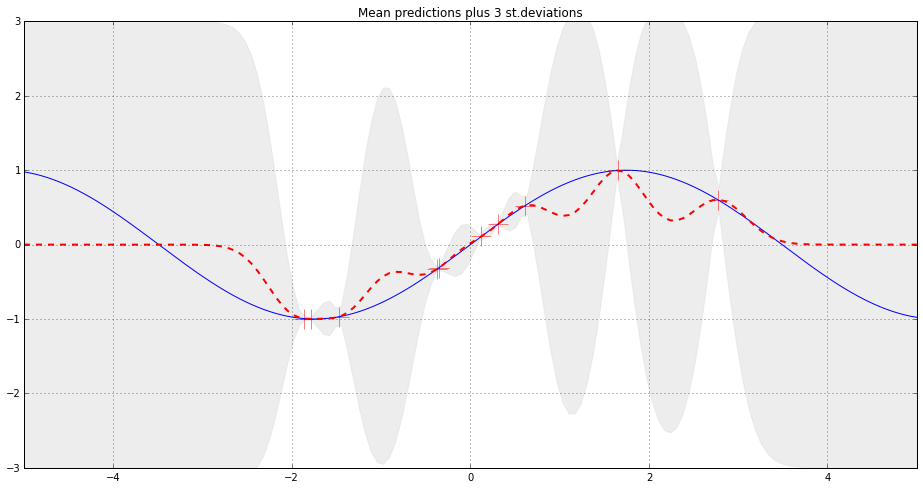

In [10]:
# PLOTS:
plt.figure(1)
plt.clf()
plt.plot(X, y, 'r+', ms=20)
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color='#DDDDDD', alpha=0.5)
plt.plot(Xtest, mu, 'r--', lw=2)
plt.title('Mean predictions plus 3 st.deviations')
plt.axis([-5, 5, -3, 3])
plt.grid(True)
plt.show()

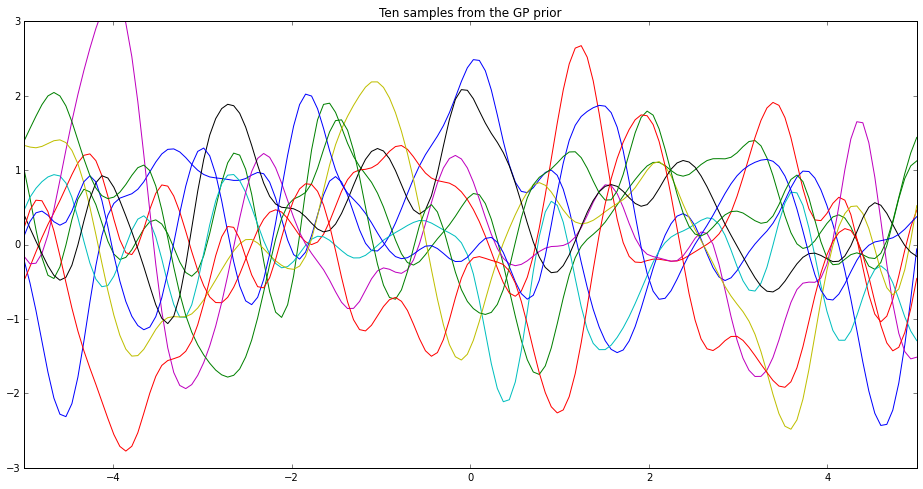

In [11]:
# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))

plt.figure(2)
plt.clf()
plt.plot(Xtest, f_prior)
plt.title('Ten samples from the GP prior')
plt.axis([-5, 5, -3, 3])
plt.show()

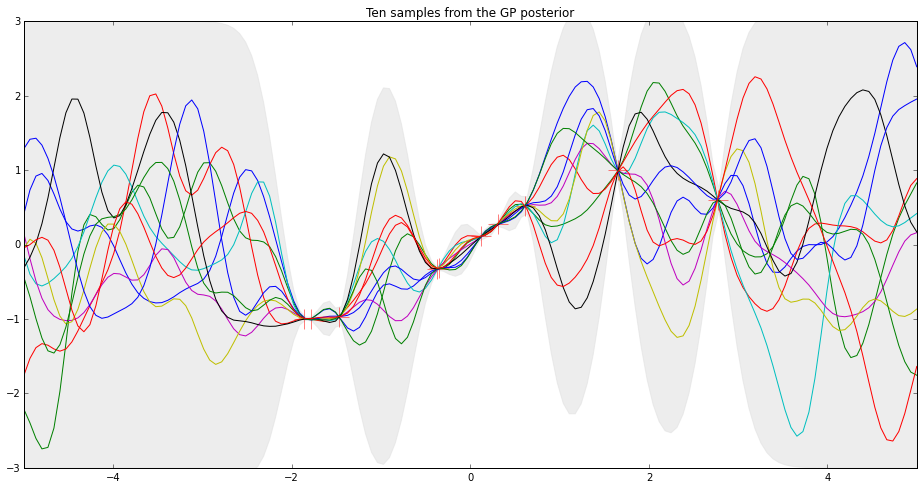

In [12]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
plt.figure(3)
plt.clf()
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color='#DDDDDD', alpha=0.5)
plt.plot(X, y, 'r+', ms=20)
plt.plot(Xtest, f_post)
plt.title('Ten samples from the GP posterior')
plt.axis([-5, 5, -3, 3])

plt.show()